In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
accepts = pd.read_csv('C:/Users/acerpc/Desktop/data_folder/accepts.csv',skipinitialspace=True)
print(accepts.shape)
accepts.head()

(5845, 25)


,application_id,account_number,bad_ind,vehicle_year,vehicle_make,bankruptcy_ind,tot_derog,tot_tr,age_oldest_tr,tot_open_tr,tot_rev_tr,tot_rev_debt,tot_rev_line,rev_util,fico_score,purch_price,msrp,down_pyt,loan_term,loan_amt,ltv,tot_income,veh_mileage,used_ind,weight
0,2314049,11613,1,1998.0,FORD,N,7.0,9.0,64.0,2.0,1.0,506.0,500.0,101,650.0,17200.00,17350.0,0.00,36,17200.00,99.0,6550.00,24000.0,1,1.00
1,63539,13449,0,2000.0,DAEWOO,N,0.0,21.0,240.0,11.0,7.0,34605.0,57241.0,60,649.0,19588.54,19788.0,683.54,60,19588.54,99.0,4666.67,22.0,0,4.75
2,7328510,14323,1,1998.0,PLYMOUTH,N,7.0,10.0,60.0,NaN,NaN,NaN,NaN,0,613.0,13595.00,11450.0,0.00,60,10500.00,92.0,2000.00,19600.0,1,1.00
3,8725187,15359,1,1997.0,FORD,N,3.0,10.0,35.0,5.0,4.0,4019.0,5946.0,68,603.0,12999.00,12100.0,3099.00,60,10800.00,118.0,1500.00,10000.0,1,1.00
4,4275127,15812,0,2000.0,TOYOTA,N,0.0,10.0,104.0,2.0,0.0,0.0,1800.0,0,764.0,26328.04,22024.0,0.00,60,26328.04,122.0,4144.00,14.0,0,4.75


In [5]:
accepts = accepts.dropna(axis=0,how='any')

In [6]:
target = accepts['bad_ind']
x = accepts.loc[:,'bankruptcy_ind':'used_ind']
x['lti_temp'] = x['loan_amt']/x['tot_income']
x['lti_temp'] = x['lti_temp'].map(lambda x: 10 if x>=10 else x)
del x['loan_amt']
x['bankruptcy_ind'] = x['bankruptcy_ind'].replace({'N':0,'Y':1})
x.head()

,bankruptcy_ind,tot_derog,tot_tr,age_oldest_tr,tot_open_tr,tot_rev_tr,tot_rev_debt,tot_rev_line,rev_util,fico_score,purch_price,msrp,down_pyt,loan_term,ltv,tot_income,veh_mileage,used_ind,lti_temp
0,0,7.0,9.0,64.0,2.0,1.0,506.0,500.0,101,650.0,17200.00,17350.0,0.00,36,99.0,6550.00,24000.0,1,2.625954
1,0,0.0,21.0,240.0,11.0,7.0,34605.0,57241.0,60,649.0,19588.54,19788.0,683.54,60,99.0,4666.67,22.0,0,4.197541
3,0,3.0,10.0,35.0,5.0,4.0,4019.0,5946.0,68,603.0,12999.00,12100.0,3099.00,60,118.0,1500.00,10000.0,1,7.200000
4,0,0.0,10.0,104.0,2.0,0.0,0.0,1800.0,0,764.0,26328.04,22024.0,0.00,60,122.0,4144.00,14.0,0,6.353292
5,1,2.0,15.0,136.0,4.0,3.0,3651.0,5747.0,64,680.0,26272.72,26375.0,0.00,36,100.0,5400.00,1.0,0,4.865319


In [7]:
from sklearn.model_selection import train_test_split

train_x,test_x,trian_y,test_y = train_test_split(x,target,test_size=0.2,random_state=1234)

In [8]:
clf = DecisionTreeClassifier(criterion='gini',max_depth=3,class_weight=None,random_state=1234)
clf.fit(train_x,trian_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best')

In [9]:
from sklearn import metrics
print(metrics.classification_report(test_y,clf.predict(test_x)))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88       648
           1       0.51      0.16      0.24       173

   micro avg       0.79      0.79      0.79       821
   macro avg       0.66      0.56      0.56       821
weighted avg       0.75      0.79      0.74       821



In [10]:
clf.set_params(**{'class_weight':{0:1,1:3}})
clf.fit(train_x,trian_y)
print(metrics.classification_report(test_y,clf.predict(test_x)))

              precision    recall  f1-score   support

           0       0.87      0.77      0.81       648
           1       0.39      0.57      0.46       173

   micro avg       0.72      0.72      0.72       821
   macro avg       0.63      0.67      0.64       821
weighted avg       0.77      0.72      0.74       821



In [12]:
from sklearn.model_selection import ParameterGrid, GridSearchCV

max_depth = [None,]
max_leaf_nodes = np.arange(5,10,1)
class_weight = [{0:1,1:2},{0:1,1:3}]
param_grid = {'max_depth':max_depth,'max_leaf_nodes':max_leaf_nodes,'class_weight':class_weight}
clf_cv = GridSearchCV(clf,param_grid,cv=5,scoring='roc_auc')
clf_cv.fit(train_x,trian_y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight={0: 1, 1: 3}, criterion='gini',
            max_depth=3, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [None], 'max_leaf_nodes': array([5, 6, 7, 8, 9]), 'class_weight': [{0: 1, 1: 2}, {0: 1, 1: 3}]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [13]:
print(metrics.classification_report(test_y,clf_cv.predict(test_x)))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       648
           1       0.42      0.49      0.45       173

   micro avg       0.75      0.75      0.75       821
   macro avg       0.64      0.65      0.65       821
weighted avg       0.77      0.75      0.76       821



In [14]:
clf_cv.best_params_

{'class_weight': {0: 1, 1: 2}, 'max_depth': None, 'max_leaf_nodes': 8}

In [15]:
clf_cv.best_score_

0.7166297349330728

In [16]:
train_est = clf_cv.predict(train_x)
train_est_p = clf_cv.predict_proba(train_x)[:,1]
test_est = clf_cv.predict(test_x)
test_est_p = clf_cv.predict_proba(test_x)[:,1]

Text(0.8, 0.1, '0.7358')

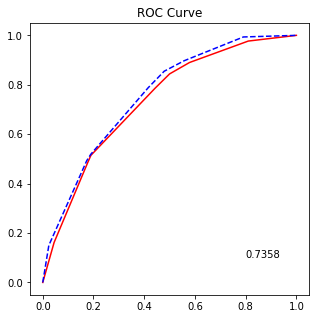

In [22]:
fpr_test,tpr_test,th_test = metrics.roc_curve(test_y,test_est_p)
fpr_train,tpr_train,th_train = metrics.roc_curve(trian_y,train_est_p)
plt.figure(figsize=(5,5))
plt.plot(fpr_test,tpr_test,'r-')
plt.plot(fpr_train,tpr_train,'b--')
plt.title('ROC Curve')
plt.text(0.8,0.1,round(metrics.roc_auc_score(test_y,test_est_p),4))

In [19]:
import pydotplus
from IPython.display import Image
import sklearn.tree as tree

In [20]:
dot_data = tree.export_graphviz(clf,
                             out_file=None,
                             feature_names=x.columns,
                             class_names=['0','1'],
                             filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

warning, language png not recognized, use one of:
 dot canon plain plain-ext



In [22]:
graph.write_pdf('C:/Users/acerpc/Desktop/tree.pdf')

warning, language pdf not recognized, use one of:
 dot canon plain plain-ext



True